### A Practical Walk Through on How to Use Regression to predict in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

## Read In The Dataset

In [2]:
train = pd.read_csv('train (1).csv')
test = pd.read_csv('test (1).csv')

In [3]:
train.head(3)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69


In [4]:
print(train.shape, test.shape)

(4990, 13) (3532, 12)


## Checking for missing Values

In [5]:
train.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

## Combine both train set and test set together

In [6]:
data = pd.concat([train, test])
data.head(3)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69


In [7]:
data.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight            1463
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             2409
Store_Location_Type       0
Store_Type                0
Item_Store_Returns     3532
dtype: int64

### Handling Missing Values

In [8]:
data['Store_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Store_Size, dtype: int64

In [9]:
fill_value = {'Store_Size': 'Medium', 'Item_Weight': data['Item_Weight'].mean()}
data.fillna(fill_value, inplace = True)

In [10]:
data.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight               0
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size                0
Store_Location_Type       0
Store_Type                0
Item_Store_Returns     3532
dtype: int64

### Data Preparation

In [11]:
num_var = data.select_dtypes(np.number)
cat_var = data.select_dtypes('object')

In [12]:
num_var.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year',
       'Item_Store_Returns'],
      dtype='object')

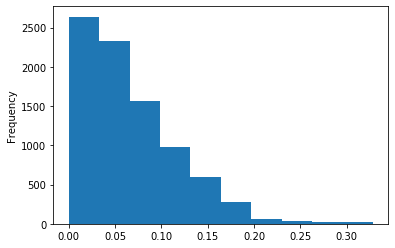

In [13]:
(num_var['Item_Visibility']).plot(kind = 'hist')

In [14]:
cat_var.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Sugar_Content',
       'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type'],
      dtype='object')

In [15]:
cat_var['Store_Type'].unique()

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

### OneHot encode Categorical variables

In [16]:
import category_encoders as ce
col = ['Item_Sugar_Content','Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']
one_hot = ce.OneHotEncoder(cols = col)
data = one_hot.fit_transform(data)
print(data.shape)

(8522, 37)


In [17]:
data.head(3)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content_1,Item_Sugar_Content_2,Item_Sugar_Content_3,Item_Visibility,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Item_Type_16,Item_Price,Store_Start_Year,Store_Size_1,Store_Size_2,Store_Size_3,Store_Location_Type_1,Store_Location_Type_2,Store_Location_Type_3,Store_Type_1,Store_Type_2,Store_Type_3,Store_Type_4,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,1,0,0,0.068535,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,357.54,2005,1,0,0,1,0,0,1,0,0,0,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,1,0,0,0.040912,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,355.79,1994,0,1,0,1,0,0,0,1,0,0,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,1,0,0,0.041178,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,350.79,2014,1,0,0,0,1,0,0,1,0,0,6381.69


### Divide into Both train and Test

In [18]:
train = data[data['Item_Store_Returns'].notnull()]
test = data[data['Item_Store_Returns'].isnull()]

print(train.shape, test.shape)

(4990, 37) (3532, 37)


In [19]:
train_id = train['Item_ID']
test_id = test['Item_ID']

### Modelling

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

X = train.drop(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Store_Returns'], axis = 1)
y = train.Item_Store_Returns

xtest = test.drop(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Store_Returns'], axis = 1)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### Regression Techniques used

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LinearRegression
from xgboost import XGBRegressor

#linear Regression
lr_model = LinearRegression()

#Ridge Regression
ridge_model = Ridge(alpha = 0.1, fit_intercept=True)

#xgboost 
xgb_model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.1, max_depth=3,min_child_weight=1.7817, 
                             n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.8, silent=1,
                             random_state =7, nthread = -1)

### Import and initialize scalers

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer, RobustScaler, PolynomialFeatures

#Scaling
sd = StandardScaler()
minmax = MinMaxScaler()
Norm = Normalizer()
rb = RobustScaler()
poly = PolynomialFeatures(degree = 2)

#create pipeline
pipe = make_pipeline(lr_model)

### Train and Score model

In [41]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [49]:
train_pred = pipe.predict(x_train)
test_pred = pipe.predict(x_test)
train_score = np.sqrt(mean_squared_error(y_train, train_pred))
test_score = np.sqrt(mean_squared_error(y_test, test_pred))
print('mean squared error score for the train set is {0:2.3f}'.format(train_score))
print('mean squared error score for the test set is {0:2.3f}'.format(test_score))

mean squared error score for the train set is 2944.757
mean squared error score for the test set is 2990.093


### Making Prediction

In [51]:
pred_test = pipe.predict(xtest)
sub = pd.DataFrame({'Item_ID': test_id, 'Item_Store_Returns': pred_test})
sub.head(4)

,Item_ID,Item_Store_Returns
0,DRA59,3566.859531
1,DRA59,7296.021773
2,DRB01,7333.554025
3,DRB13,4052.463036
